# Introduction

Dataset downloaded from: https://www.kaggle.com/rishidamarla/amazoncom-fashion-products  
The dataset covers 10000 products listings from Amazon UK created by PromptCloud's in-house web-crawling service. A bigger dataset (more than 7 million fashion products) can be downloaded here: https://data.world/promptcloud/fashion-products-on-amazon-com

I used the free sample dataset as original data source, and programmed some functions to help current or potential fashion product sellers on Amazon UK. Rationale using full dataset would be similar, so that the focus of this project are some interactive functions. The purpose is to provide sellers and other stakeholders an easy way to retrieve information and possibly do some basic exploratory data analysis.   

Core Functions are as follow:  

1. A list of Unique Values for selected column (a reference for further analysis)
2. by Category: What's the average review rating and price? 
3. by Category 3: What's the top N highest review products?  
4. by Manufacturer: What products are each of them selling?
5. by Category 2: What's the price distribution look like? Also some data visualization.  
6. Export the CSV files after Text Cleaning.  

The package was also published in test pypi, you can view it here: https://test.pypi.org/project/amazonfashion/. 

##  Install the package and import 

In [3]:
pip install -i https://test.pypi.org/simple/ amazonfashion

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [4]:
from AmazonFashion import AmazonFashion as a

# 1. A list of Unique Values for Selected Column

Using this function, you can get a list of unique values for a selected column, which would help with later analysis. Below is an example for Category 1. If you would like to know what columns are available, please us column_names().
An error would occur if you input a string that's not a column name here.

In [15]:
a.value_list('cat1')

Hobbies
nan
Characters & Brands
Fancy Dress
Bags
Arts & Crafts
Handbags & Shoulder Bags
Games
Figures & Playsets
Home Accessories
Sweets, Chocolate & Gum
Sports Toys & Outdoor
Die-Cast & Toy Vehicles
Baby & Toddler Toys
Storage, Cleaning & Ring Sizers
Bedding & Linens
Office Supplies
Party Supplies
Camping & Hiking
Pretend Play
Women
Electronic Toys
Car Parts
Dolls & Accessories
Indoor Lighting
Educational Toys
Laundry, Storage & Organisation
Supporters' Gear
Jams, Honey & Spreads
Novelty & Special Use
Musical Toy Instruments
Men
Sex & Sensuality
Cooking & Dining
Medication & Remedies
Puppets & Puppet Theatres
Jigsaws & Puzzles
Dogs
Medical Supplies & Equipment
Pens, Pencils & Writing Supplies
Worlds Apart
Gardening
Lab & Scientific Products
Novelty Jewellery


# 2. Average Review Rating/Price by Category

This function allows you to get the average review rating or price by category. For example, the below example returns the result for average review rating by Category 3.  
Note that cat1 and cat2 takes value from ['cat1','cat2', 'cat3', 'cat4','cat5'], we suggest that the first index is smaller than the second, so that you get a more structured return. Inputing the same index for both would yield a calculation only in one level of subcategory.

In [5]:
a.category_avg_metric(metric = 'rating', cat1 = 'cat1', cat2 = 'cat3')

cat1                              cat2                                     
Arts & Crafts                     Art & Craft Supplies                         5.000000
                                  Art Sand                                     4.652174
                                  Blackboards                                  4.673333
                                  Children's Chalk                             4.433333
                                  Children's Craft Kits                        4.696956
                                  Colouring Pencils                            4.600000
                                  Colouring Pens & Markers                     4.649333
                                  Doll Making                                  4.500000
                                  Drawing & Painting Supplies                  4.500000
                                  Felt Kits                                    4.300000
                                  Painting B

# 3. Top n Highest Review Products for Selected Category 3

For a prespecified Category 3, what's the highest n review rating products? Informations of the top rated products in the category 3 prespecified in the below example. The function op_n_highest_review(n , cat3) has two parameters, with the default set to be n=10, cat3 = 'Rail Vehicles'.

In [13]:
a.top_n_highest_review(3)

,product_name,product_information,product_description,price,average_review_rating,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
150,Hornby 00 Gauge 510mm BR 2-BIL 2 Car Electric Multiple Unit Train Model,Technical Details Item Weight694 g Product Dimensions36 x 20.1 x 6.1 cm Manufacturer recommended age:10 years and up Item model numberR3177 Number of Game Players1 Scale1:76 Track Width/GaugeOO Ba...,"Product Description Hornby DCC Ready 00 Gauge BR 2-BIL 2 car electric multiple unit train model. The Southern Railway (SR) was established in 1923, linking London with the Channel ports, South Wes...",£107.99,5.0 out of 5 stars,http://www.amazon.co.uk/Hornby-Gauge-2-Bil-Train-Yellow/dp/B00IJZIMDK | http://www.amazon.co.uk/Hornby-RailRoad-2-BIL-Electric-Multiple/dp/B00EV2VLYM | http://www.amazon.co.uk/Hornby-Majestic-E-Li...,http://www.amazon.co.uk/Hornby-Gauge-2-Bil-Train-Yellow/dp/B00IJZIMDK | http://www.amazon.co.uk/Hornby-RailRoad-2-BIL-Electric-Multiple/dp/B00EV2VLYM
122,Model Railway 'OO' / 'HO' Scale C88 Schools Class Kings Wimbledon Locomotive Plastic Kit,Technical Details Item Weight82 g Product Dimensions20.8 x 18 x 3.8 cm Manufacturer recommended age:10 years and up Item model numberC088 Assembly RequiredYes Scale1:76 Engine Typesteam Track Widt...,"Dapol OO Gauge 1:76 Plastic Model Kit - Schools Class Steam Locomotive - ""King's Wimbledon"". PLEASE NOTE THAT THIS IS A PLASTIC MODEL KIT AND IS SUPPLIED UNASSEMBLED AND UNPAINTED. PAINT AND GLUE ...",£9.65,5.0 out of 5 stars,http://www.amazon.co.uk/Dapol-Model-Railway-Truro-Plastic/dp/B0035G5U88 | http://www.amazon.co.uk/Dapol-Railway-Evening-Locomotive | http://www.amazon.co.uk/Railway-Britain-Squadron-Locomotive | h...,http://www.amazon.co.uk/Dapol-Model-Railway-Truro-Plastic/dp/B0035G5U88 | http://www.amazon.co.uk/Dapol-Schools-Shrewsbury
168,Hornby 00 Gauge 274mm 1st Class Brighton Belle Car Pullman Trailer No.2 Coach Model,Technical Details Item Weight299 g Product Dimensions30.8 x 9.6 x 4.2 cm Manufacturer recommended age:14 years and up Item model numberR4529 Scale1::76 Track Width/GaugeOO Batteries Included?No ...,Product Description Hornby 1st class brighton belle car pullman trailer coach. Addional coach for the R2988/X1969 Pullman brighton belle train pack. Safety notice: Detailed Scale - model. This coa...,NaN,5.0 out of 5 stars,http://www.amazon.co.uk/Hornby-Gauge-Brighton-Pullman-Trailer/dp/B00765AURK | http://www.amazon.co.uk/Hornby-Gauge-Brighton-Pullman-Trailer/dp/B00765AUSY | http://www.amazon.co.uk/Hornby-R2988-Bri...,http://www.amazon.co.uk/Hornby-Gauge-Brighton-Pullman-Trailer/dp/B00765AUSY | http://www.amazon.co.uk/Hornby-Gauge-Brighton-Pullman-Trailer/dp/B00765AURK


However, if the n is zero or negative, it will return a message. 

In [16]:
a.top_n_highest_review(-1)

AssertionError: n must be non-negative

# 4. What products are each of manufacturer selling?

A function to check products available on Amazon about a certain manufacturer. Below is an example for LEGO. If the manufacturer name does not match any values in dataset, you will get an empty dataframe with only the column name in first row. 

In [22]:
a.manufacturer_product('LEGO')

,manufacturer,product_name,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,product_information,product_description,customers_who_bought_this_item_also_bought,items_customers_buy_after_viewing_this_item
614,LEGO,Lego City 2824: Advent Calendar 2010,£43.87,19 new,40,4.7 out of 5 stars,NaN,Technical Details Item Weight440 g Product Dimensions39 x 26 x 7.2 cm Manufacturer recommended age:5 - 12 years Item model number2824 Number of Puzzle Pieces271 Assembly RequiredYes Batteries Incl...,"The holidays are coming to LEGO City, one gift at a time! Unwrap an adventure during the first 24 days of December! Countdown to the holidays with a new LEGO City minifigure, vehicle or accessory ...",http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-City-7687-Advent-Calendar/dp/B001U3ZMRC | http://www.amazon.co.uk/LEGO-City-60024-Advent-Calend...,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar/dp/B00SDTU3C0 | http://www.amazon.co.uk/LEGO-Friends-41102-Advent-Cale...
626,LEGO,LEGO Friends 41016: Advent Calendar,£24.95,19 new,87,4.5 out of 5 stars,NaN,Technical Details Item Weight218 g Product Dimensions38.2 x 7.1 x 26.2 cm Manufacturer recommended age:5 - 12 years Item model number6024542 Main Language(s)English Number of Puzzle Pieces213 Asse...,"Product Description LEGO Friends Advent Calendar features 24 gifts, each enclosed in its own compartment in a LEGO Friends holiday-themed calendar. Includes Stephanie and Lily mini-doll figures. F...",http://www.amazon.co.uk/LEGO-Friends-41040-Advent-Calendar/dp/B00I4IXUCA | http://www.amazon.co.uk/DryNites-Pyjama-Pants-Girls-27-57/dp/B00FAQEI70 | http://www.amazon.co.uk/LEGO-City-60024-Advent-...,http://www.amazon.co.uk/LEGO-Friends-41102-Advent-Calendar/dp/B00SDU33IU | http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Friends-41040-Advent...
627,LEGO,LEGO Star Wars 75018: Jek-14's Stealth Starfighter,£68.87,16 new,30,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details Item Weight907 g Product Dimensions48 x 28.2 x 6.1 cm Manufacturer recommended age:8 - 14 years Item model number6025085 Main Language(s)English Number of Puzzle Pieces550 Assemb...,"Product Description LEGO® Star Wars™ Jek-14’s [TM] Stealth Starfighter features retractable landing gear, opening cockpit with space for a minifigure, folding wings, rotating and elevating blaster...",http://www.amazon.co.uk/LEGO-Star-Wars-75004-Headhunter | http://www.amazon.co.uk/LEGO-Star-Wars-9497-Striker-Class/dp/B006ZS4WIM | http://www.amazon.co.uk/LEGO-Star-Wars-75051-Fighter/dp/B00I4IYR...,http://www.amazon.co.uk/Star-Wars-75102-Fighter/dp/B00SDTTJLQ | http://www.amazon.co.uk/75094-Star-Wars-Imperial-Tydirium/dp/B00SDTU3Z2 | http://www.amazon.co.uk/LEGO-Star-Wars-75104-Command/dp/B0...
634,LEGO,LEGO City 7687 Advent Calendar 2009,£24.99,17 new,45,4.8 out of 5 stars,NaN,Technical Details Item Weight399 g Product Dimensions39 x 25.8 x 7.2 cm Manufacturer recommended age:5 - 12 years Item model number190811 Assembly RequiredNo Batteries Required?No Batteries Includ...,Manufacturer's Description 24 days of LEGO® City building fun! This advent calendar has nine minifigures included and many other cool accessories that make your LEGO City even more exciting.,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/Play-Doh-B2199-Advent-Calendar/dp/B00R9DBK9Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar...,http://www.amazon.co.uk/LEGO-City-60099-Advent-Calendar/dp/B00SDTYX2Q | http://www.amazon.co.uk/LEGO-Star-Wars-75097-Calendar/dp/B00SDTU3C0 | http://www.amazon.co.uk/Playmobil-5494-Christmas-Calen...
651,LEGO,LEGO Star Wars 75015: Corporate Alliance Tank Droid,£39.99,21 new,34,4.8 out of 5 stars,Characters & Brands > Star Wars > Toys,Technical Details

# 5. Price Distribution for Each Category

Using this function, you can get a price distribution for the Category 2 that you specified. Below is an exmaple of Category 2: Accessories. Summary statistics of price for a certain Category 2, and a histogram of the price distribution. 

Summary Statistics for Category 2: Accessories Price
count    536.000000
mean      14.715653
std       32.182940
min        0.890000
25%        3.447500
50%        7.990000
75%       14.990000
max      447.990000
Name: p, dtype: float64


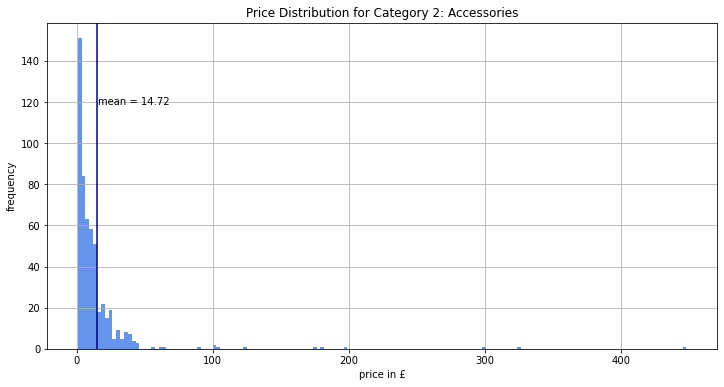

In [19]:
a.price_dist('Accessories')

However, if the Category 2 you input does not exist, an error would occur. 

In [24]:
a.price_dist('Acc')

AssertionError: The Category 2 you input does not exist. Please check!

# 6. Export the CSV files after Text Cleaning 

What if I want to store the results after text-cleaning and do some further analysis from my end? A saved csv file on local folder. You can certainly customize the path that you would like the csv file to be stored in. 

In [21]:
a.export(path = cwd)